In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

predictions = model.predict(test_images[:5])
print('Predictions:', predictions.argmax(axis=1))
print('Actual labels:', test_labels[:5].argmax(axis=1))

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 45s 58ms/step - loss: 0.2229 - accuracy: 0.9300 - val_loss: 0.0695 - val_accuracy: 0.9793
Epoch 2/5
750/750 [==============================] - 44s 59ms/step - loss: 0.0574 - accuracy: 0.9820 - val_loss: 0.0527 - val_accuracy: 0.9846
Epoch 3/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0533 - val_accuracy: 0.9831
Epoch 4/5
750/750 [==============================] - 43s 58ms/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0421 - val_accuracy: 0.9875
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0387 - accuracy: 0.9885
Test accuracy: 0.9884999990463257
1/1 [==============================] - 0s 116ms/step
Predictions: [7 2 1 0 4]
Actual labels: [7 2 1 0 4]


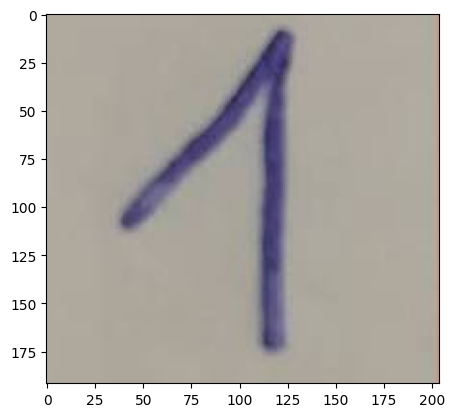

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = '/content/ddd.jpg'
image = Image.open(image_path)

plt.imshow(image)

In [3]:
from PIL import Image
import numpy as np

image_path = '/content/ddd.jpg'
image = Image.open(image_path).convert('L')

image = image.resize((28, 28))

image_array = np.array(image)

image_array = image_array.astype('float32') / 255

image_array = np.reshape(image_array, (1, 28, 28, 1))

prediction = model.predict(image_array)

predicted_digit = np.argmax(prediction)

print(f'The predicted digit is: {predicted_digit}')

1/1 [==============================] - 0s 22ms/step
The predicted digit is: 1
